<a href="https://colab.research.google.com/github/pafernannapi18/GithubIntro/blob/main/24thAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means from Scratch

In [ ]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# get the dataset
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [ ]:
n_clusters=4
a = range(X.shape[0])
np.random.seed(0)
first_point = np.random.choice(a, n_clusters, replace = False)
init = X[first_point,:]

In [ ]:
def obtain_SSE(S):
  dist = np.zeros((X.shape[0], n_clusters))
  for l in range(n_clusters):
    d_a = abs(X-init[l, :])
    d_a2 = d_a**2
    d_a3 = np.sum(d_a2, axis=1)
    dist[:, l] = d_a3
  SSE = 0
  clster = np.argmin(dist, axis=1)
  for i in range(n_clusters):
    SSE += np.sum(np.min(dist[clster==i], axis=1))    
    init[i, :] = np.mean(X[clster==i], axis=0)
  return dist, SSE, init

In [ ]:
dist, sse, init = obtain_SSE(X)
print(init)

[[-1.24587768  3.22980708]
 [ 1.99186903  0.96561071]
 [ 1.06148307  4.39922699]
 [-1.26811733  7.76378266]]


In [ ]:
print(sse)

84.33640249455568


In [ ]:
print(dist)

[[1.65763058e+00 8.55890067e+00 8.28397078e-01 1.80103044e+01]
 [2.03503003e+01 6.18610755e+01 2.35634932e+01 6.54839934e-01]
 [4.19405850e+00 1.19003431e+01 0.00000000e+00 1.64710622e+01]
 [3.31850587e+00 1.30395852e+01 1.08282823e-01 1.41975027e+01]
 [6.20659909e+00 1.58511794e+01 3.47030318e-01 1.46940734e+01]
 [2.06173754e+00 1.10972185e+01 3.74624567e-01 1.51552807e+01]
 [1.98402580e+00 2.13656863e+01 1.12264017e+01 1.33994022e+01]
 [1.78609620e+01 5.40217640e+01 1.68908134e+01 4.07442243e-01]
 [3.10188153e+00 2.11566301e+01 2.35830414e+00 6.69836920e+00]
 [1.72167740e+01 5.53410632e+01 1.90122437e+01 9.18947532e-02]
 [1.14806913e+01 4.36507582e+01 1.23092745e+01 3.03503341e-01]
 [1.29929055e+01 4.89150783e+01 1.69236018e+01 4.00797376e-01]
 [1.34050712e+01 4.82748799e+01 1.52225247e+01 4.62943832e-02]
 [1.69181548e+01 5.32939298e+01 1.69501983e+01 1.55193397e-01]
 [1.49011447e+01 4.92429535e+01 1.46307685e+01 1.96001780e-01]
 [2.44846073e+01 2.43644463e+00 1.98363386e+01 7.058040

In [ ]:
class ScratchKMeans():
  def __init__(self, n_clusters, max_iter, verbose=False, tol=5, seed=0):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.seed = seed
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

  def fit(self, X):
    self.a = range(X.shape[0])
    np.random.seed(self.seed)
    self.first_point = np.random.choice(self.a, self.n_clusters, replace=False)
    self.first_co = X[self.first_point, :]
    self.new_co = np.zeros((self.n_clusters, X.shape[1]))
    self.SSE_Rec = []

    for i in range(self.max_iter):
      self.dist = np.zeros((X.shape[0], self.n_clusters)) 
      self.yk = np.zeros((X.shape[0], self.n_clusters))

      for l in range(self.n_clusters):
        self.d_a = abs(X-self.first_co[l, :])
        self.d_a2 = self.d_a**2
        self.d_a3 = np.sum(self.d_a2, axis=1)
        self.dist[:, l] = self.d_a3
        for j in range(X.shape[0]):
          self.yk[j, l] = np.linalg.norm(X[j,:] - self.first_co[l, :])

       
      self.SSE = 0
      self.clster = np.argmin(self.yk, axis=1)

      for i in range(self.n_clusters):
        self.SSE += np.sum(np.min(self.dist[self.clster==i], axis=1))
        self.first_co[i, :] = np.mean(X[self.clster==i], axis=0)

      if np.mean(np.sqrt(np.sum(abs(self.first_co**2 - self.new_co**2), axis=1))) <= self.tol:
        break
      if (self.first_co == self.new_co).all == True:
        break
      else:
          self.new_co = np.copy(self.first_co)      
      self.SSE_Rec.append(self.SSE)

    if self.verbose:
      print(self.SSE_Rec)
    return self.clster           
  def predict(self, X):
    self.pre_dist = np.zeros((X.shape[0], self.n_clusters))
    for l in range(self.n_clusters):
      for j in range(X.shape[0]):
        self.pre_dist[j, l] = np.linalg.norm(X[j,:]-self.new_co[l,:])
    self.pre_clster = np.argmin(self.pre_dist, axis=1)
    return self.pre_clster

[84.33640249455568, 50.912773104155825]


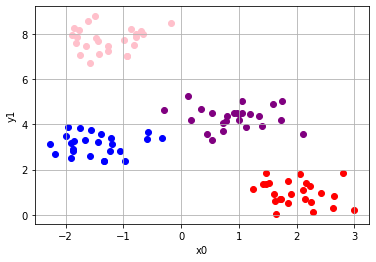

In [ ]:
KM = ScratchKMeans(n_clusters= 4, max_iter= 10, verbose=True, tol = 0.05)
KM.fit(X)
cl = KM.predict(X)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(X[:, 0][cl == 0], X[:,1][cl==0], c = 'blue')
ax.scatter(X[:, 0][cl == 1], X[:,1][cl==1], c = 'red')
ax.scatter(X[:, 0][cl == 2], X[:,1][cl==2], c = 'purple')
ax.scatter(X[:, 0][cl == 3], X[:,1][cl==3], c = 'pink')

ax.set_xlabel('x0')
ax.set_ylabel('y1')
ax.grid(True)

fig.show()

In [ ]:
(X_train, X_test, y_tain, y_test) = train_test_split(X, _, test_size=0.3, random_state=0)
KM = ScratchKMeans(n_clusters=4, max_iter=15, verbose=True, tol=0, seed=1)
KM.fit(X_train)

[445.34442338044715, 150.94139280748257, 133.768643548361, 57.09421170745124]


array([0, 2, 1, 2, 2, 1, 3, 0, 1, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 1, 3, 0,
       1, 3, 2, 1, 0, 1, 2, 3, 0, 0, 3, 2, 2, 3, 2, 2, 0, 1, 2, 2, 1, 3,
       0, 1, 1, 3, 1, 3, 3, 2, 0, 2, 3, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       3, 2, 3, 3])

SSE is being minimized (445.34442338044715, 150.94139280748257, 133.768643548361, 57.09421170745124)

Elbow method can help us determine the number of clusters

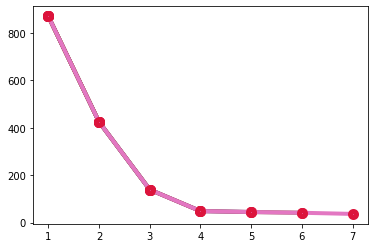

In [ ]:
sse = []
n_cl = []
for i in range(1, 8):
  n_cl.append(i)
  KM = ScratchKMeans(n_clusters=i, max_iter=15, verbose=False, tol=0, seed=3)
  KM.fit(X) 
  sse.append(KM.SSE)
  plt.plot(n_cl, sse, marker='o', markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth= 4)

In [14]:
# import the data
Wholesale = pd.read_csv('/content/drive/MyDrive/Wholesale customers data.csv')
Wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
Wholesale2 = Wholesale.drop(["Channel", "Region"], axis=1)
sc = StandardScaler()
Wholesale_std = sc.fit_transform(Wholesale2)

Because there are 6 features related to the amount of money, we reduce their dimensionality for visualization by using PCA

In [16]:
pca = PCA(n_components = 2)
pca = pca.fit(Wholesale_std)
Wholesale_pca = pca.fit_transform(Wholesale_std)

[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


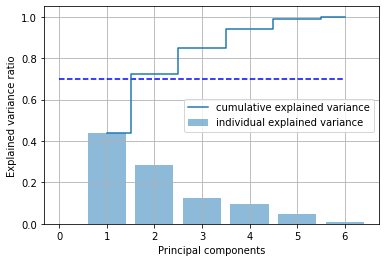

In [17]:
# Displays the distributed explanation rate of PCA
pca = PCA(n_components = None)
pca = pca.fit(Wholesale_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha = 0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid',  label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6, "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()

Lets use the elbow method to check the best n_clusters

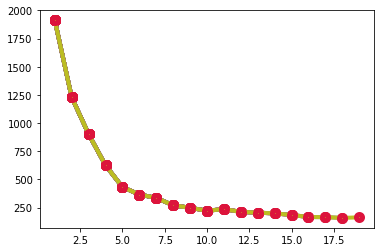

In [18]:
sse = []
n_cl = []
for i in range(1, 20):
  n_cl.append(i)
  KM = ScratchKMeans(n_clusters=i, max_iter=15, verbose=False, tol=0, seed=3)
  KM.fit(Wholesale_pca) 
  sse.append(KM.SSE)
  plt.plot(n_cl, sse, marker='o', markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth= 4)

From the elbow method you can see that 5 might be the best n_clusters but lets run our model with visualizations to see if we can check the answer by look at the figures

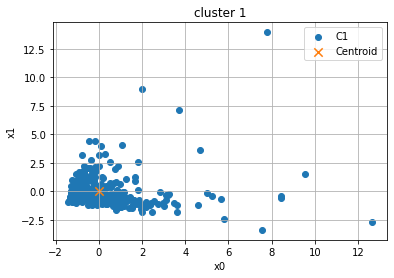

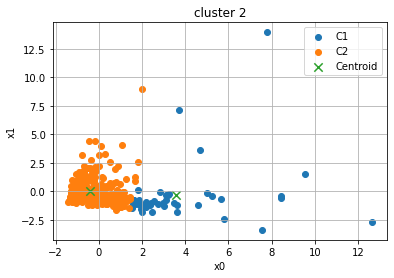

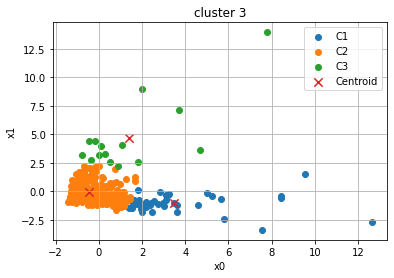

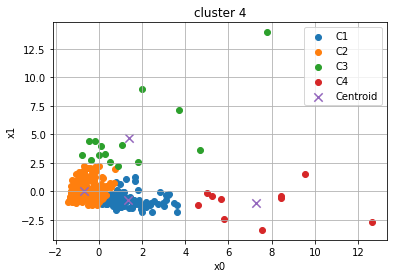

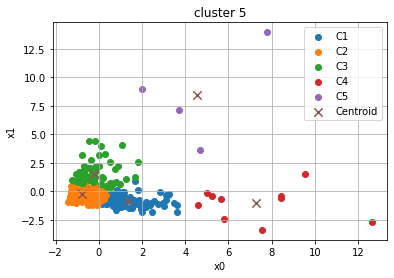

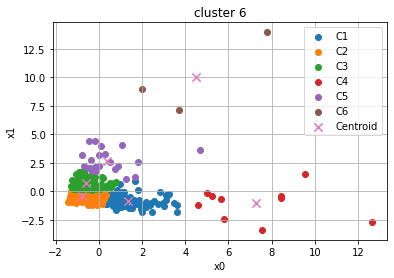

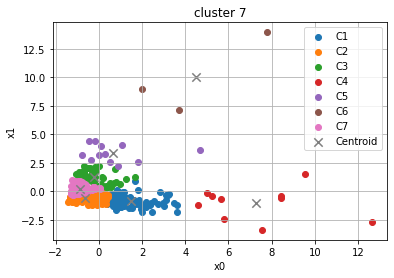

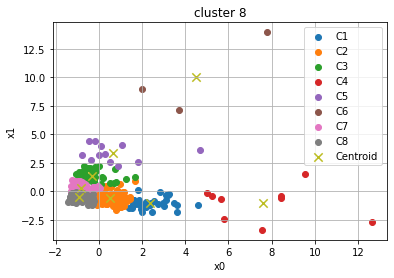

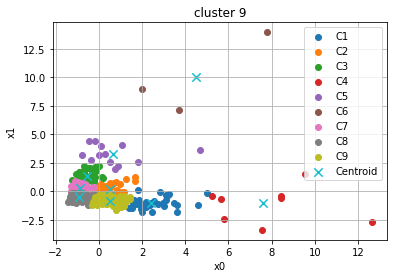

In [19]:
for i in range(1, 10):
  KM = ScratchKMeans(n_clusters=i, max_iter=15, verbose=False, tol=0, seed=3)
  KM.fit(Wholesale_pca) 
  cl = KM.predict(Wholesale_pca)

  fig = plt.figure()
  
  ax = fig.add_subplot(1, 1, 1)
  for i in range(np.unique(cl).shape[0]):
    ax.scatter(Wholesale_pca[:, 0][cl == i], Wholesale_pca[:,1][cl==i], label = 'C{}'.format(i+1))
  ax.scatter(KM.new_co[:, 0], KM.new_co[:,1], label="Centroid", s= 70, marker='x')
  ax.set_xlabel('x0')
  ax.set_ylabel('x1')
  ax.set_title('cluster {}'.format(i+1))
  ax.grid(True)

  ax.legend(loc='upper right')
  fig.show()

Comparison of the clusters to the known groups channel and region

Our own clusters vs Region

Lets check how many groups they have

In [20]:
Wholesale.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

We have 3 groups, lets use it as our n_clusters too, to compare it well

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


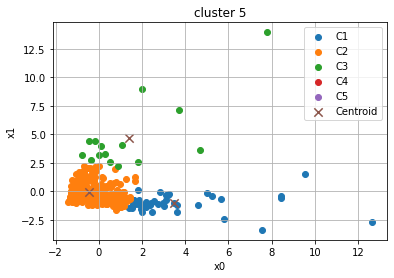

In [21]:
ax = fig.add_subplot(1, 1, 1)
KM = ScratchKMeans(n_clusters= 3, max_iter=15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca) 
cl = KM.predict(Wholesale_pca)
fig = plt.figure()
  
ax = fig.add_subplot(1, 1, 1)
for i in range(5):
  ax.scatter(Wholesale_pca[:, 0][cl == i], Wholesale_pca[:,1][cl==i], label = 'C{}'.format(i+1))
ax.scatter(KM.new_co[:, 0], KM.new_co[:,1], label="Centroid", s= 70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster {}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

Region

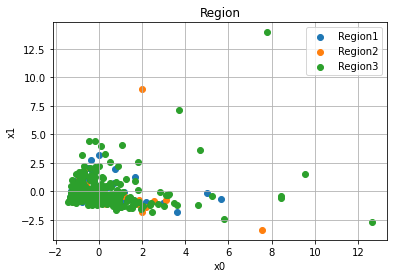

In [22]:
Wholesale["Region"].unique()
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 1], Wholesale_pca[:,1][Wholesale["Region"] == 1], label = "Region1")
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 2], Wholesale_pca[:,1][Wholesale["Region"] == 2], label = "Region2")
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 3], Wholesale_pca[:,1][Wholesale["Region"] == 3], label = "Region3")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Region')
plt.grid(True)

plt.legend(loc = 'upper right')

We have a diffence between the classification by region and the one by K-means. In fact we have overlapping of regions between categories.

Our own clusters vs Channel 

Lets check how many groups they have

In [23]:
Wholesale.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

We have 2 groups, lets use it as our n_clusters too, to compare it well

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


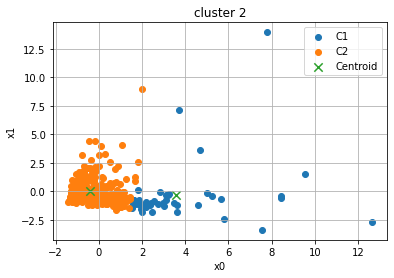

In [24]:
ax = fig.add_subplot(1, 1, 1)
KM = ScratchKMeans(n_clusters= 2, max_iter=15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca) 
cl = KM.predict(Wholesale_pca)
fig = plt.figure()
  
ax = fig.add_subplot(1, 1, 1)
for i in range(2):
  ax.scatter(Wholesale_pca[:, 0][cl == i], Wholesale_pca[:,1][cl==i], label = 'C{}'.format(i+1))
ax.scatter(KM.new_co[:, 0], KM.new_co[:,1], label="Centroid", s= 70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster {}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

Region

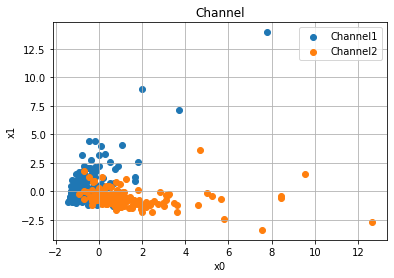

In [25]:
Wholesale["Channel"].unique()
plt.scatter(Wholesale_pca[:,0][Wholesale["Channel"] == 1], Wholesale_pca[:,1][Wholesale["Channel"] == 1], label = "Channel1")
plt.scatter(Wholesale_pca[:,0][Wholesale["Channel"] == 2], Wholesale_pca[:,1][Wholesale["Channel"] == 2], label = "Channel2")

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Channel')
plt.grid(True)

plt.legend(loc = 'upper right')

Classsification by channel and the one by Region are also different here but we haave less overlappping.

**Let's visualize the features vs the known groups** **bold text** **bold text** bold text

In [26]:
Wholesale2["cluster"] = cl
Wholesale2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


**Fresh**

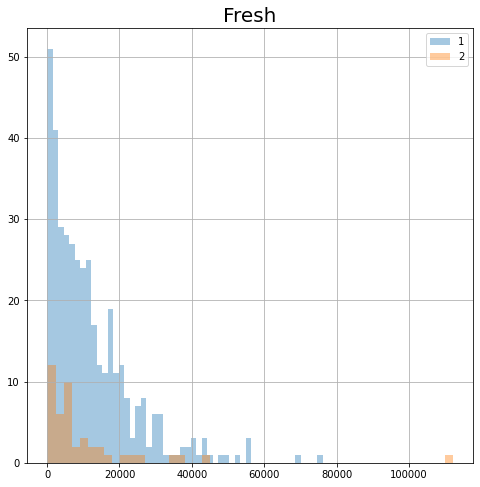

In [27]:
Wholesale_cl1 = Wholesale[Wholesale2["cluster"] == 1]
Wholesale_cl0 = Wholesale[Wholesale2["cluster"] == 0]
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale_cl1["Fresh"], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale_cl0["Fresh"], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Fresh', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

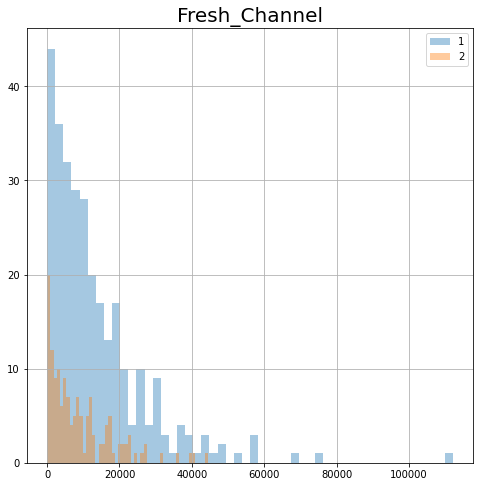

In [28]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale["Fresh"][Wholesale["Channel"] == 1], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale["Fresh"][Wholesale["Channel"] == 2], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Fresh_Channel', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

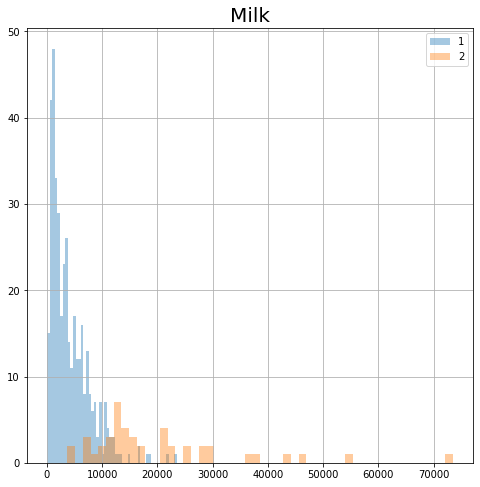

In [29]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale_cl1["Milk"], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale_cl0["Milk"], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Milk', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

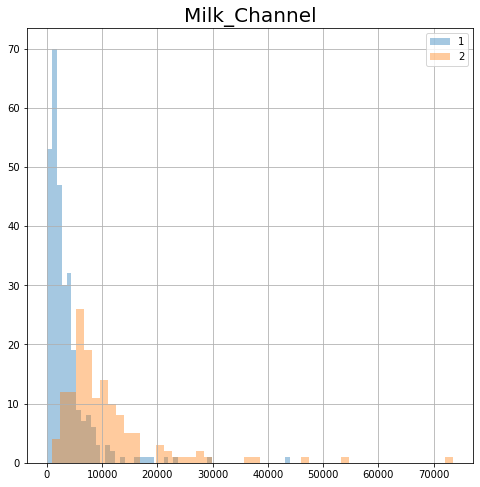

In [30]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale["Milk"][Wholesale["Channel"] == 1], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale["Milk"][Wholesale["Channel"] == 2], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Milk_Channel', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

**Grocery**

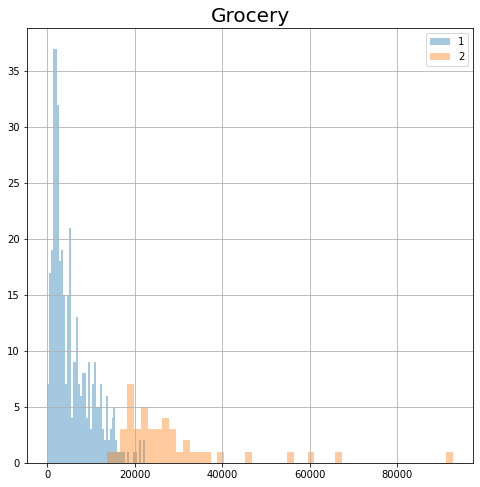

In [31]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale_cl1["Grocery"], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale_cl0["Grocery"], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Grocery', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

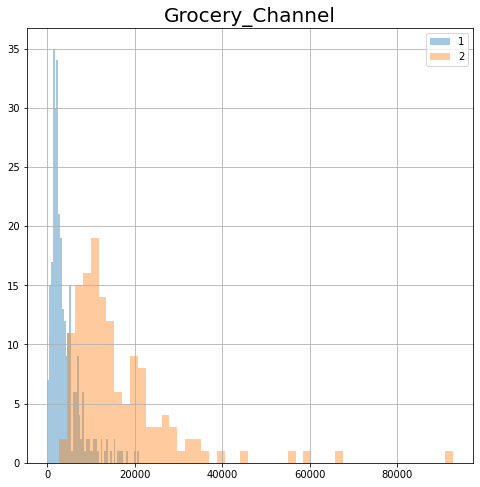

In [32]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale["Grocery"][Wholesale["Channel"] == 1], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale["Grocery"][Wholesale["Channel"] == 2], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Grocery_Channel', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

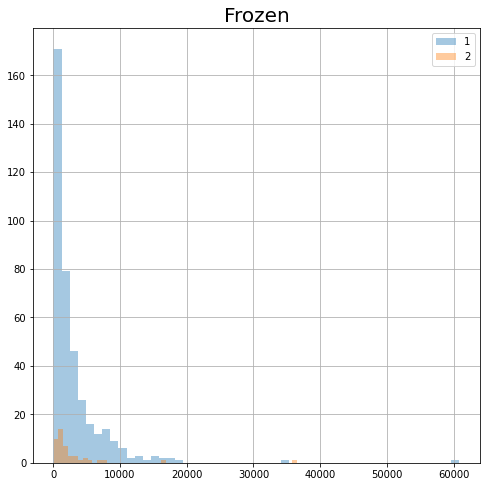

In [33]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale_cl1["Frozen"], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale_cl0["Frozen"], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Frozen', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

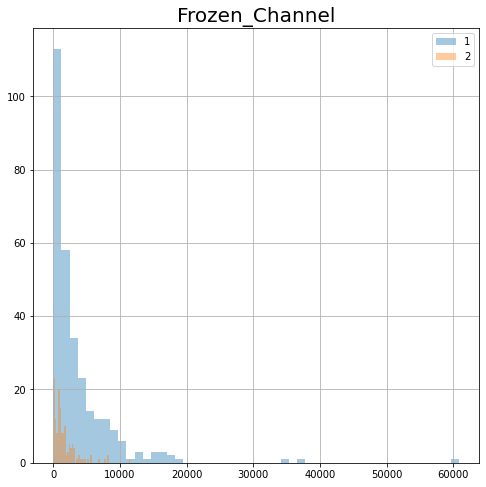

In [34]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale["Frozen"][Wholesale["Channel"] == 1], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale["Frozen"][Wholesale["Channel"] == 2], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Frozen_Channel', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

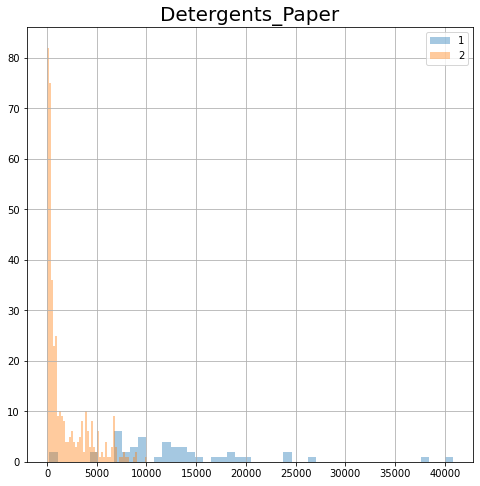

In [35]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale_cl0["Detergents_Paper"], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale_cl1["Detergents_Paper"], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Detergents_Paper', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

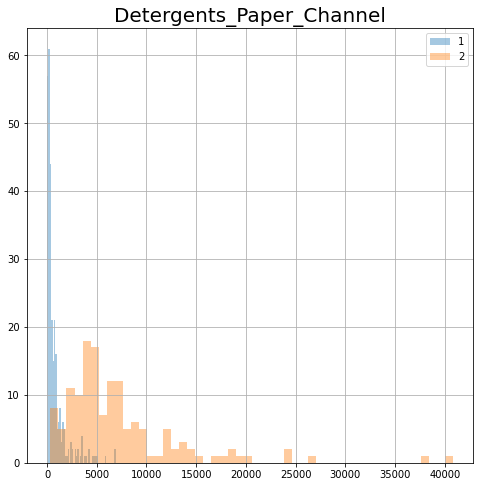

In [36]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale["Detergents_Paper"][Wholesale["Channel"] == 1], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale["Detergents_Paper"][Wholesale["Channel"] == 2], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Detergents_Paper_Channel', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

**Delicassen**

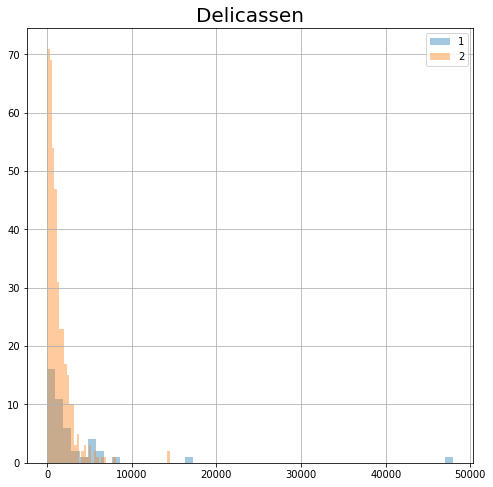

In [37]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale_cl0["Delicassen"], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale_cl1["Delicassen"], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Delicassen', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

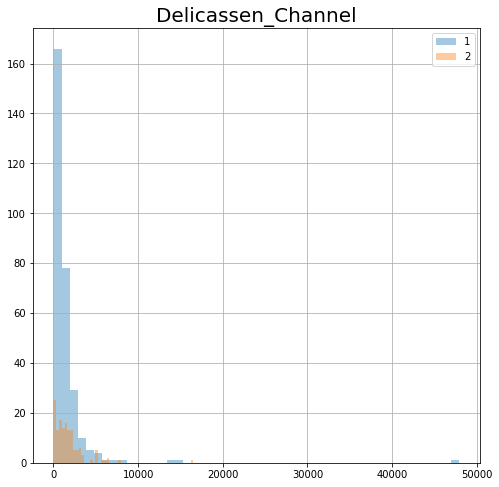

In [38]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8, 8))
ax1.hist(Wholesale["Delicassen"][Wholesale["Channel"] == 1], bins= 50, alpha= 0.4, label = "1")
ax1.hist(Wholesale["Delicassen"][Wholesale["Channel"] == 2], bins= 50, alpha= 0.4, label = "2")
ax1.set_title('Delicassen_Channel', size = 20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

**Useful information for wholesalers**

In [39]:
Wholesale2 = pd.read_csv('/content/drive/MyDrive/Wholesale customers data.csv')
Wholesale3 = Wholesale2.drop(["Channel", "Region"], axis=1)
Wholesale3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


Lets create clusters and use it to check information from our dataset

In [41]:
KM = ScratchKMeans(n_clusters=5, max_iter= 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)
data_cl0 = Wholesale3[cl==0]
data_cl1 = Wholesale3[cl==1]
data_cl2 = Wholesale3[cl==2]
data_cl3 = Wholesale3[cl==3]
data_cl4 = Wholesale3[cl==4]
cl_data = pd.DataFrame(cl)
cl_data = cl_data.rename(columns= {0:"cluster"})
Wholesale_add_cl = pd.concat([Wholesale3, cl_data], axis=1)

#groupby
Wholesale_mean_cl = Wholesale_add_cl.groupby("cluster").mean()

In [42]:
Wholesale_mean_cl.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,5282.846154,10403.164835,16838.901099,1266.384615,7436.967033,1505.923077
1,9148.992337,2866.084291,3816.011494,2036.333333,996.831418,930.072797
2,27618.486486,5158.810811,5552.851351,7501.054054,964.486486,2474.351351
3,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
4,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

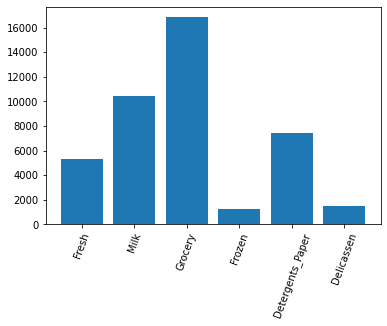

In [43]:
hight = np.array(Wholesale_mean_cl.iloc[0])
plt.bar(Wholesale_mean_cl.columns, hight)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

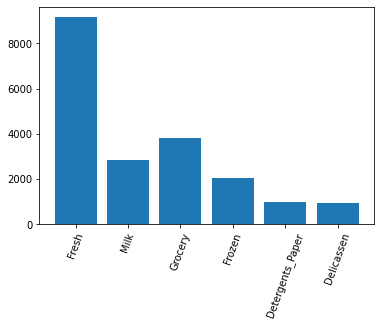

In [44]:
hight = np.array(Wholesale_mean_cl.iloc[1])
plt.bar(Wholesale_mean_cl.columns, hight)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

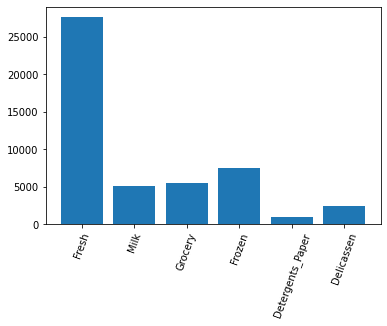

In [45]:
hight = np.array(Wholesale_mean_cl.iloc[2])
plt.bar(Wholesale_mean_cl.columns, hight)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

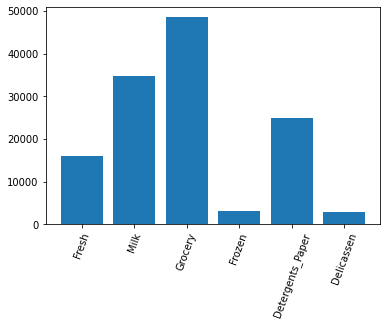

In [46]:
hight = np.array(Wholesale_mean_cl.iloc[3])
plt.bar(Wholesale_mean_cl.columns, hight)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

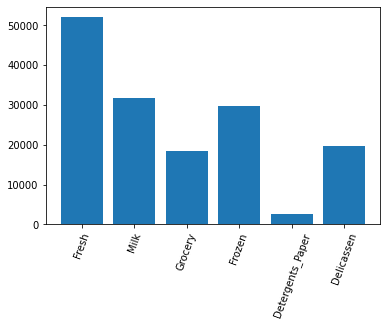

In [47]:
hight = np.array(Wholesale_mean_cl.iloc[4])
plt.bar(Wholesale_mean_cl.columns, hight)
plt.xticks(rotation=70)

From the above distribution and the previous results, we see that Cluster 0 in term of price is higher(when we sum up the different prices).

Client in Cluster 1 have the highest for the **Fresh**.

As for Cluster 4, **Fresh**, **Milk** and **Frozen** come in that order for highest purchases.